# Momentum Trading Strategy


Trend following strategy

In [93]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf

## Download data

We're gonna sue yahoo finance api and look at the golf etf

In [94]:
gld = yf.download("GLD")
day = np.arange(1, len(gld)+1)
gld['day'] = day
gld.drop(columns = ['Volume'], inplace = True)
gld = gld[['day', 'Open', 'High', 'Low', 'Close']]
gld.head()

[*********************100%***********************]  1 of 1 completed


Price,day,Open,High,Low,Close
Ticker,,GLD,GLD,GLD,GLD
Date,,,,,
2004-11-18,1,44.430000,44.490002,44.070000,44.380001
2004-11-19,2,44.490002,44.919998,44.470001,44.779999
2004-11-22,3,44.750000,44.970001,44.740002,44.950001
2004-11-23,4,44.880001,44.919998,44.720001,44.750000
2004-11-24,5,44.930000,45.049999,44.790001,45.049999


In [95]:
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5083 entries, 2004-11-18 to 2025-01-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (day, )       5083 non-null   int64  
 1   (Open, GLD)   5083 non-null   float64
 2   (High, GLD)   5083 non-null   float64
 3   (Low, GLD)    5083 non-null   float64
 4   (Close, GLD)  5083 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 238.3 KB


## 2. Add data/transform data


We use a move average crossover to generate signals
For this strat we will always by in a trade(long/short)

**Add MA to data frame**

In [96]:
gld['9-day'] = gld['Close'].rolling(9).mean().shift()
gld['21-day'] = gld['Close'].rolling(21).mean().shift()
gld[20:30]

Price,day,Open,High,Low,Close,9-day,21-day
Ticker,,GLD,GLD,GLD,GLD,,
Date,,,,,,,
2004-12-17,21,43.930000,44.220001,43.779999,44.189999,44.071111,NaN
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.962222,44.594286
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.876666,44.592381
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.900000,44.565714
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,43.926667,44.521428
2004-12-27,26,44.290001,44.560001,44.270000,44.480000,44.018889,44.498571
2004-12-28,27,44.419998,44.470001,44.290001,44.369999,44.082222,44.471428
2004-12-29,28,43.919998,44.020000,43.349998,43.660000,44.173333,44.427619


### Add signal column

In [97]:
gld['signal'] = np.where(gld['9-day'] > gld['21-day'], 1, 0)
gld['signal'] = np.where(gld['9-day'] < gld['21-day'], -1, gld['signal'])
gld.dropna(inplace=True)
gld.head()

Price,day,Open,High,Low,Close,9-day,21-day,signal
Ticker,,GLD,GLD,GLD,GLD,,,
Date,,,,,,,,
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.962222,44.594286,-1
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.876666,44.592381,-1
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.900000,44.565714,-1
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,43.926667,44.521428,-1
2004-12-27,26,44.290001,44.560001,44.270000,44.480000,44.018889,44.498571,-1


### Calculate instantenous returns/system returns

In [98]:
gld['return'] = np.log(gld['Close']).diff()
gld['system_return'] = gld['signal'] * gld['return']
gld['entry'] = gld.signal.diff()
gld.head(20)

Price,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Ticker,,GLD,GLD,GLD,GLD,,,,,,
Date,,,,,,,,,,,
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.962222,44.594286,-1,NaN,NaN,NaN
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.876666,44.592381,-1,-0.002710,0.002710,0.0
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.900000,44.565714,-1,-0.004533,0.004533,0.0
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,43.926667,44.521428,-1,0.005663,-0.005663,0.0
2004-12-27,26,44.290001,44.560001,44.270000,44.480000,44.018889,44.498571,-1,0.004732,-0.004732,0.0
2004-12-28,27,44.419998,44.470001,44.290001,44.369999,44.082222,44.471428,-1,-0.002476,0.002476,0.0
2004-12-29,28,43.919998,44.020000,43.349998,43.660000,44.173333,44.427619,-1,-0.016131,0.016131,0.0
2004-12-30,29,43.500000,43.880001,43.490002,43.830002,44.136667,44.344762,-1,0.003886,-0.003886,0.0


In [99]:
### Plot trades on time series

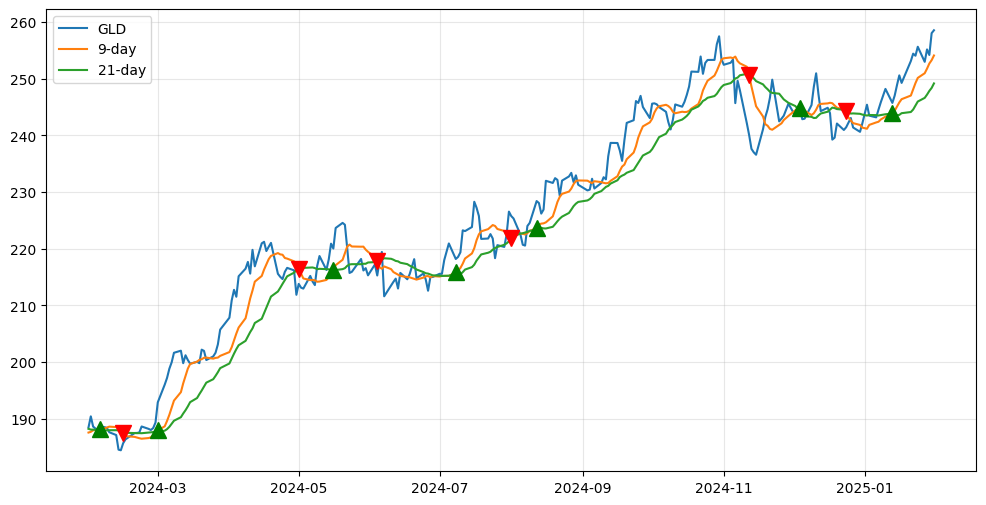

In [100]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[-252:]['Close'], label = 'GLD')
plt.plot(gld.iloc[-252:]['9-day'], label = '9-day')
plt.plot(gld.iloc[-252:]['21-day'], label = '21-day')
plt.plot(gld[-252:].loc[gld.entry == 2].index, gld[-252:]['9-day'][gld.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(gld[-252:].loc[gld.entry == -2].index, gld[-252:]['21-day'][gld.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

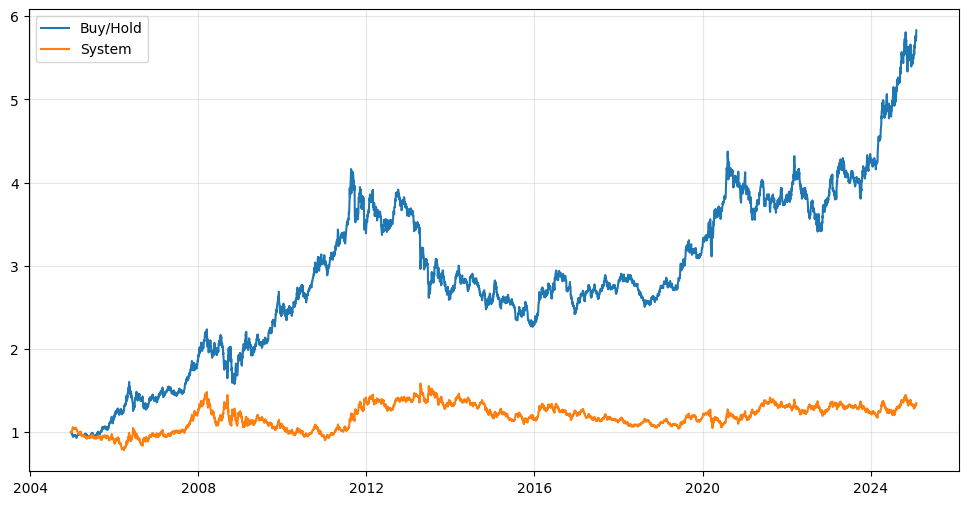

In [101]:
plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [102]:
np.exp(gld['return']).cumprod()[-1] -1


/var/folders/m8/6vszwx195fl9598f558j20ph0000gn/T/ipykernel_89482/2481991586.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(gld['return']).cumprod()[-1] -1


np.float64(4.831303488245552)

In [103]:
np.exp(gld['system_return']).cumprod()[-1] -1


/var/folders/m8/6vszwx195fl9598f558j20ph0000gn/T/ipykernel_89482/434290422.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(gld['system_return']).cumprod()[-1] -1


np.float64(0.3490221442708117)